In [3]:
dat = read.csv('../data/AVM_day0_spectra.csv', sep='\t')

In [4]:
ppm = rev(as.numeric(dat[['X']]))
spectra = t(as.matrix(dat[c(2:17)]))
spectra = spectra[, ncol(spectra):1]

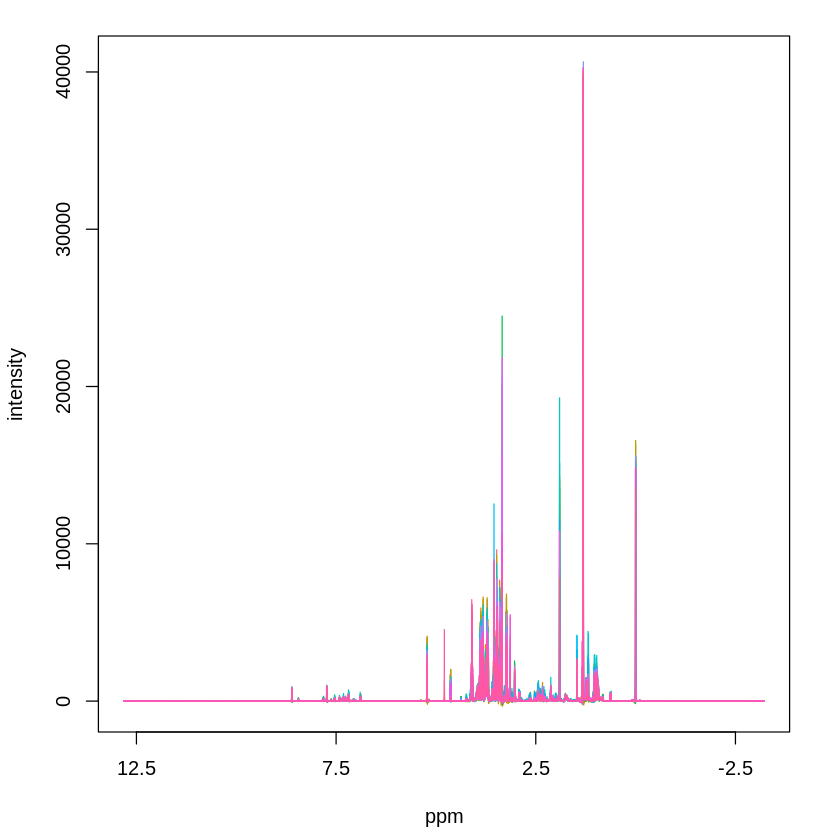

In [5]:
library(speaq)
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm)
#                    title = 'Wine data spectra', 
#                    groupFactor = wine.color, 
#                    legend.extra.x = 1, 
#                    legend.extra.y = 1.1)

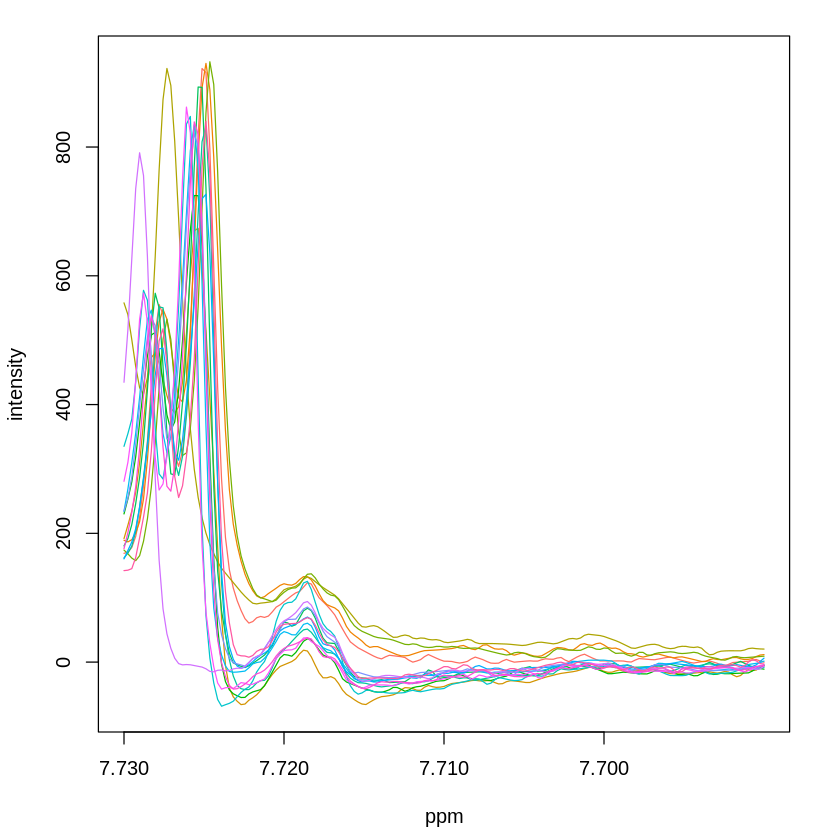

In [6]:
# small excerpt by defining the region of interest
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm, 
                   legend.extra.x = 1.05, 
                   legend.extra.y = 1.0,
                   ROI.ppm = 7.71, 
                   ROI = NULL, 
                   roiWidth.ppm = 0.02,
                   legendpos = "topright" )

In [7]:
peaks <- speaq::getWaveletPeaks(Y.spec=spectra, 
                                     X.ppm=ppm,
                                     window.split=4,
                                     baselineThresh = 100,
                                     SNR.Th = -1, 
                                     nCPU = -1,
                                     include_nearbyPeaks = TRUE)

[1] "detecting peaks"
  |======================================================================| 100%
[1] "fixing duplicate detections"
  |======================================================================| 100%


In [8]:
grouped <- speaq::PeakGrouper(Y.peaks = peaks,
                                   min.samp.grp = 5,
                                   grouping.window.width = 10)

[1] "regrouping peaks"
  |======================================================================| 100%
[1] "verifying regroupment"
  |======================================================================| 100%


In [9]:
head(grouped[grouped$peakPPM < 7.75 & grouped$peakPPM > 7.70,])

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
79,20757,7.73767,1323.380,30.21855,10,4
80,20757,7.73595,1411.756,35.14007,11,6
81,20757,7.73620,1335.635,23.27369,12,9
82,20757,7.73595,1407.292,27.24546,11,10
83,20757,7.73595,1423.517,31.20818,11,12
84,20757,7.73644,1322.575,20.92387,11,14


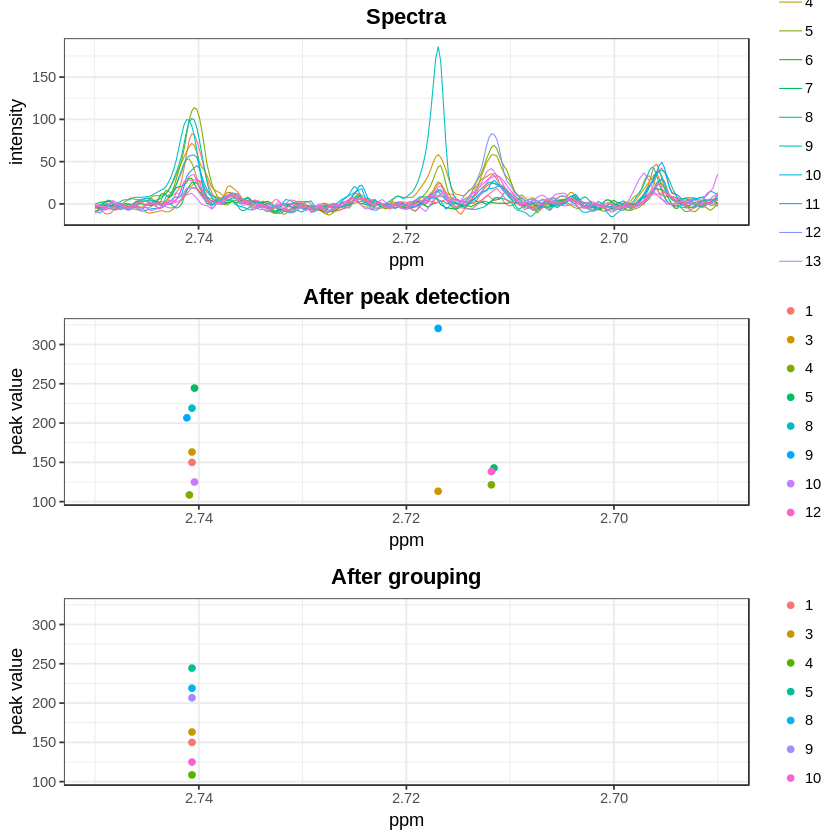

In [10]:
# adding labels to the dat a for plotting and the group ppm values
library(ggplot2)
ROI.ppm <- 2.72
roiWidth.ppm <- 0.03

speaq::ROIplot(Y.spec = spectra, 
               X.ppm = ppm, 
               ungrouped.peaks = peaks,
               grouped.peaks = grouped, 
               ROI.ppm = ROI.ppm,
               roiWidth.ppm = roiWidth.ppm)
#                groupLabels = as.factor(wine.color))

In [11]:
filled <- speaq::PeakFilling(Y.grouped = grouped, 
                                  Y.spec = spectra,  
                                  max.index.shift = 10,
                                  nCPU = -1)

[1] "There are 16 samples in the dataset."
  |======================================================================| 100%


In [12]:
features <- speaq::BuildFeatureMatrix(filled)

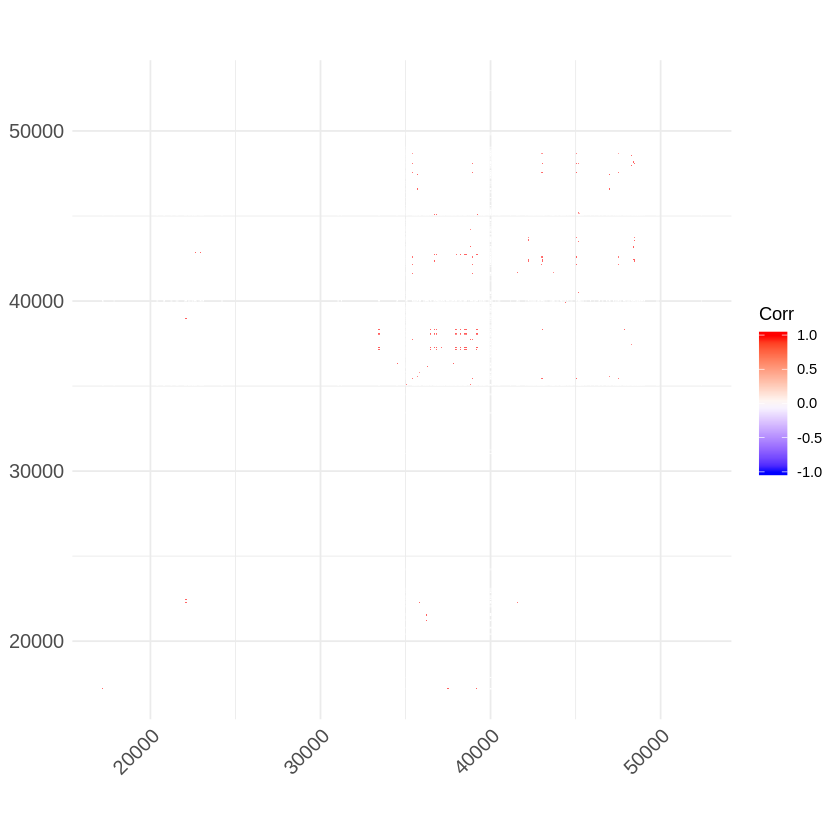

In [13]:
library(ggcorrplot)

corr <- cor(features, method='spearman')

corr[corr<0.75] <- 0
corr[corr>=0.75] <- 1 
ggcorrplot(corr, hc.order=TRUE, outline.col="white")

In [14]:
library(reshape2)
nrow(melt(corr[corr>0.75]))

[1] 2773

In [15]:
#  41184 43785 48091
filled[filled$peakIndex == 41184, ]

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
2001,41184,2.740660,149.90207,19.70609,5.5,1
2002,41184,2.740660,163.16483,22.54889,16.0,3
2003,41184,2.740910,108.52481,11.24757,16.0,4
2004,41184,2.740420,244.49797,34.40487,10.5,5
2005,41184,2.740660,218.96797,38.10743,12.5,8
2006,41184,2.741150,206.74238,25.38114,15.5,9
2007,41184,2.740420,124.91893,17.15098,16.0,10
3885,41184,2.740697,91.32844,NA,16.5,2
3886,41184,2.740697,65.11781,NA,20.0,6
3887,41184,2.740697,53.58383,NA,20.0,7


In [27]:
# install.packages("igraph")

In [16]:
library(igraph)
G = graph_from_adjacency_matrix(corr, mode='undirected', diag=FALSE)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [17]:
max_cliques = max_cliques(G)

In [18]:
features[, max_cliques[140][[1]]]

,45178,40549,45206,48091,48043,43502
1,169.6003,1178.6397,861.0118,752.7104,767.6411,163.5868
2,217.4346,1264.9033,935.9076,1146.7866,1094.1054,186.8129
3,217.7253,1313.2251,974.7207,933.8303,923.2875,177.2492
4,206.2353,1267.8588,932.5630,965.5993,792.6150,207.0931
5,189.9893,1204.4184,838.4447,990.6565,904.7048,179.9373
6,181.5078,1103.1292,818.1426,807.0828,767.8550,146.3104
7,152.0420,953.6341,736.4753,581.2116,592.2000,148.8081
8,191.6968,1137.7957,855.3028,919.0695,830.4559,170.4208
9,179.4876,1230.0789,868.3912,1207.8904,1245.9159,213.3949
10,200.0569,1263.0157,893.8320,800.0706,808.1844,164.6951


In [75]:
peakIdx <- 43554
meanPeakPPM1 <- mean(filled[filled$peakIndex == peakIdx, ]$peakPPM)
peakIdx <- 40549
meanPeakPPM2 <- mean(filled[filled$peakIndex == peakIdx, ]$peakPPM)
peakIdx <- 45206
meanPeakPPM3 <- mean(filled[filled$peakIndex == peakIdx, ]$peakPPM)
peakIdx <- 48091
meanPeakPPM4 <- mean(filled[filled$peakIndex == peakIdx, ]$peakPPM)

In [19]:
peakPPMs <- c()
for (peak in names(max_cliques[140][[1]])) {
    peakPPMs <- c(peakPPMs, round(mean(filled[filled$peakIndex == peak, ]$peakPPM), 3))
}

HMDBsearchR(peakPPMs, ppmTol = 0.02, returnURL = TRUE)

ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Operation was aborted by an application callback


In [35]:
ggplot(features[, max_cliques[140][[1]]])

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not a numeric vector


In [46]:
as.table(features[, max_cliques[140][[1]]])

       45178     40549     45206     48091     48043     43502
1   169.6003 1178.6397  861.0118  752.7104  767.6411  163.5868
2   217.4346 1264.9033  935.9076 1146.7866 1094.1054  186.8129
3   217.7253 1313.2251  974.7207  933.8303  923.2875  177.2492
4   206.2353 1267.8588  932.5630  965.5993  792.6150  207.0931
5   189.9893 1204.4184  838.4447  990.6565  904.7048  179.9373
6   181.5078 1103.1292  818.1426  807.0828  767.8550  146.3104
7   152.0420  953.6341  736.4753  581.2116  592.2000  148.8081
8   191.6968 1137.7957  855.3028  919.0695  830.4559  170.4208
9   179.4876 1230.0789  868.3912 1207.8904 1245.9159  213.3949
10  200.0569 1263.0157  893.8320  800.0706  808.1844  164.6951
11  156.3909 1041.7114  777.5676  732.7640  709.4729  132.9774
12  177.6719 1056.8689  820.2924  516.1636  552.7229  143.2148
13  144.0720  996.8735  749.9017  564.2282  500.3761  126.8847
14  176.6464  974.7631  752.4254  716.0573  567.4476  161.9641
15  158.7669  961.5419  760.5248  632.0883  648.8263  1

In [50]:
write.csv(features, 'features.csv')

In [51]:
write.csv(filled, 'filled.csv')